In [1]:
from pathlib import Path
import datetime as dt
import random as rd

import astropy.units as u

from pyipn import copy_template, Universe
from pyipn.detector import Detector
from pyipn.grb import GRB
from pyipn.geometry import Pointing
from pyipn.io.orbits.tle import position_skyfield

In [4]:
tle_G = 'GLAST2018-01-01 00:00:00--2018-12-31 00:00:00_tle.txt'
tle_I = 'INTEGRAL2018-01-01 00:00:00--2018-12-31 00:00:00_tle.txt'
date = dt.datetime(2018, 9, 13)

integral = Detector.from_GCRS(position_skyfield(date, tle_I),
                              Pointing(rd.random()*360, (rd.random()-0.5)*180),
                              'INTEGRAL')
glast = Detector.from_GCRS(position_skyfield(date, tle_G),
                           Pointing(rd.random()*360, (rd.random()-0.5)*180),
                           'GLAST')

grb = GRB(80., -30., 100. * u.Mpc, 500., 2., 5.)

[0.         0.01509374]


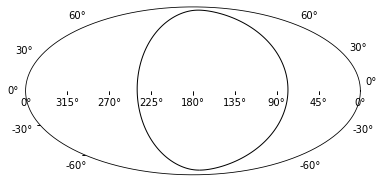

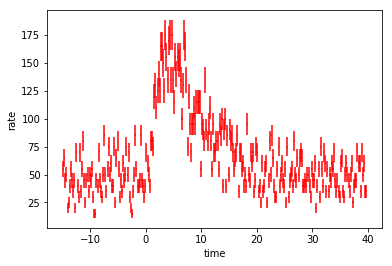

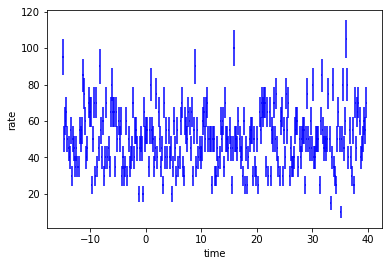

In [5]:
uni = Universe(grb)

uni.register_detector(integral)
uni.register_detector(glast)

uni.explode_grb(tstart=-50,tstop=100)
print(uni._T0)
uni.plot_annulus('INTEGRAL', 'GLAST')

uni.light_curves['INTEGRAL'].display(-15,40,.2,color='red')
uni.light_curves['GLAST'].display(-15,40,.2,color='blue')

xyzI=integral.location.get_cartesian_coord().xyz.value

xyzG=glast.location.get_cartesian_coord().xyz.value